# Nakazato 2013 Models

This notebook includes an example of how to read the .fits files located in same directory as this notebook. These files contain neutrino luminosity, mean energy, and energy spectrum pinch parameter (alpha) as functions of time for the CCSN neutrino flavors. These were obtained using models from Nakazato et al., 2013 and 2015. Data are public and taken from their [website](http://asphwww.ph.noda.tus.ac.jp/snn/).

The citation for use of the database is: Supernova Neutrino Light Curves and Spectra for Various Progenitor Stars: From Core Collapse to Proto-neutron Star Cooling, K. Nakazato, K. Sumiyoshi, H. Suzuki, T. Totani, H. Umeda, and S. Yamada, [Astrophys. J. Supp. 205 (2013) 2](http://dx.doi.org/10.1088/0067-0049/205/1/2), [arXiv:1210.6841](http://arxiv.org/abs/1210.6841).

If the BH model with LS220 EOS is used, the citation is: Spectrum of the Supernova Relic Neutrino Background and Metallicity |Evolution of Galaxies, K. Nakazato, E. Mochida, Y. Niino, and H. Suzuki, [Astrophys. J. 804 (2015) 75](http://dx.doi.org/10.1088/0004-637X/804/1/75), [arXiv:1503.01236](http://arxiv.org/abs/1503.01236).

These examples use code taken from IceCube's fast supernova monte carlo, [ASTERIA](https://github.com/IceCubeOpenSource/ASTERIA). 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models import Nakazato_2013
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

In [2]:
mpl.rc('font', size=16)

In [3]:
ifile = '../../models/Nakazato_2013/nakazato-shen-z0.004-t_rev100ms-s20.0.fits'
model = Nakazato_2013(ifile)

In [4]:
model

**Nakazato_2013 Model**: nakazato-shen-z0.004-t_rev100ms-s20.0.fits

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $20$ $\mathrm{M_{\odot}}$|
|Metallicity | $0.004$|
|Revival time | $100$ $\mathrm{ms}$|
|EOS | SHEN|

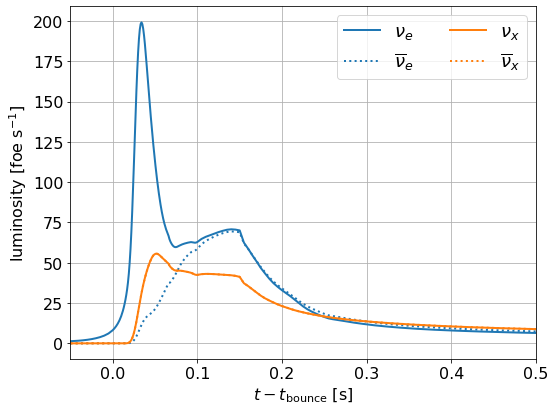

In [5]:
fig, ax = plt.subplots(1, figsize=(8,6))
for flavor in Flavor:

    ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
            label=flavor.to_tex(),
            color = 'C0' if flavor.is_electron else 'C1',
            ls = '-' if flavor.is_neutrino else ':',
            lw = 2 )

ax.set(xlim=(-0.05, 0.5),
       xlabel=r'$t-t_{\rm bounce}$ [s]',
       ylabel=r'luminosity [foe s$^{-1}$]')
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=18)

fig.tight_layout();

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation,

#### Normal mass ordering

In [6]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 100*u.ms

ispec = model.get_initialspectra(t, E)
ospec_nmo = model.get_oscillatedspectra(t, E, xform_nmo)

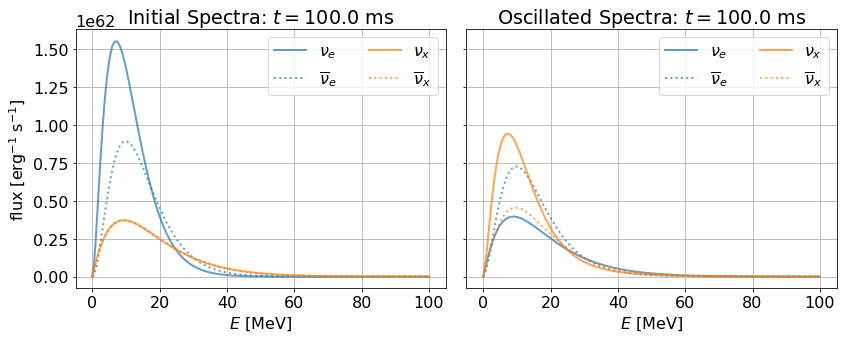

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();

#### Inverted mass ordering

In [8]:
# Adiabatic MSW effect. NMO is used by default.
xform_imo = AdiabaticMSW(mh=MassHierarchy.INVERTED)

ospec_imo = model.get_oscillatedspectra(t, E, xform_imo)

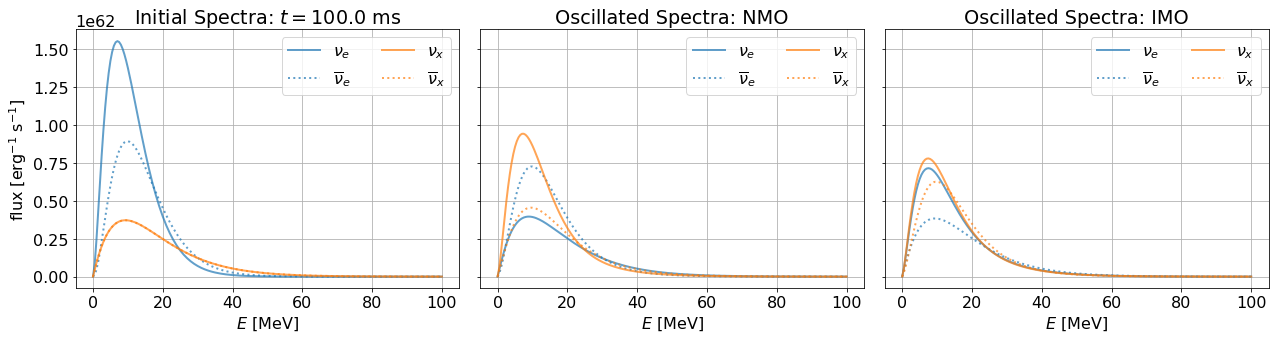

In [9]:
fig, axes = plt.subplots(1,3, figsize=(18,5), sharex=True, sharey=True, tight_layout=True)

mh = ['NMO', 'IMO']

for i, spec in enumerate([ispec, ospec_nmo, ospec_imo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: {}'.format(mh[i-1]))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();